In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Attrition data.csv") 

In [3]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mean(), inplace=True)
data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].mean(), inplace=True)
data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].mean(), inplace=True)
data['JobSatisfaction'].fillna(data['JobSatisfaction'].mean(), inplace=True)
data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mean(), inplace=True)

In [6]:
data.isnull().values.any()

False

In [7]:
data.duplicated().sum()

0

In [8]:
data.to_excel('cleaned_employee_attrition.xlsx', index=False)

In [9]:
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.493497,3.659108,0.0,...,7.774275,1.288978,6.125135,3.221699,3.567327,1.089654,1.098753,0.703195,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


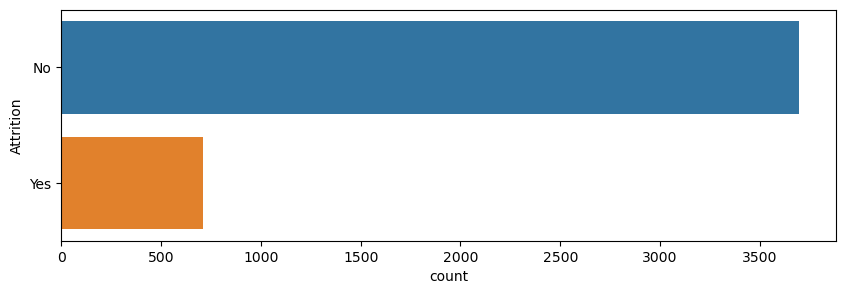

In [10]:
plt.figure(figsize=(10,3))
sns.countplot(y='Attrition',data=data)
plt.show()

Target column is highly imbalanced, we need to balance the data by using statistical methods or it will lead to imbalanced learning

EDA

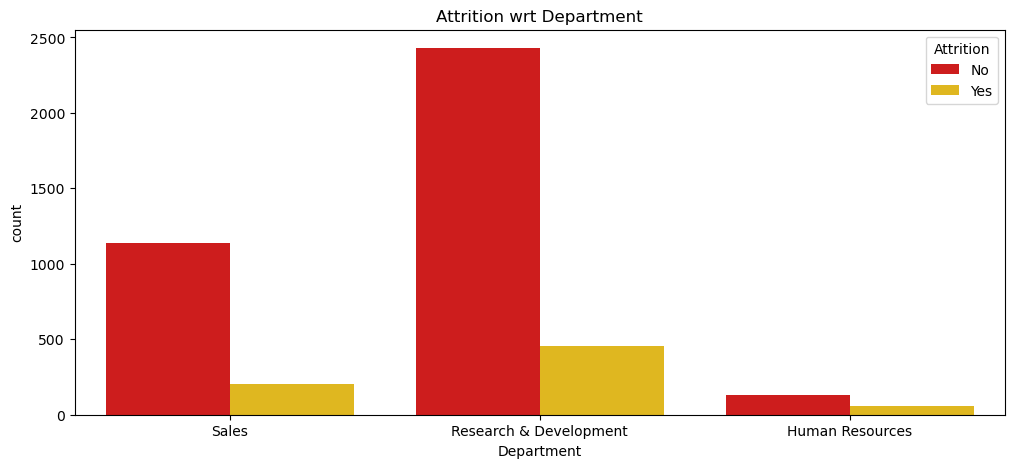

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=data,palette='hot')
plt.title("Attrition wrt Department")
plt.show()

We can observe that human resources department has relatively more attrition

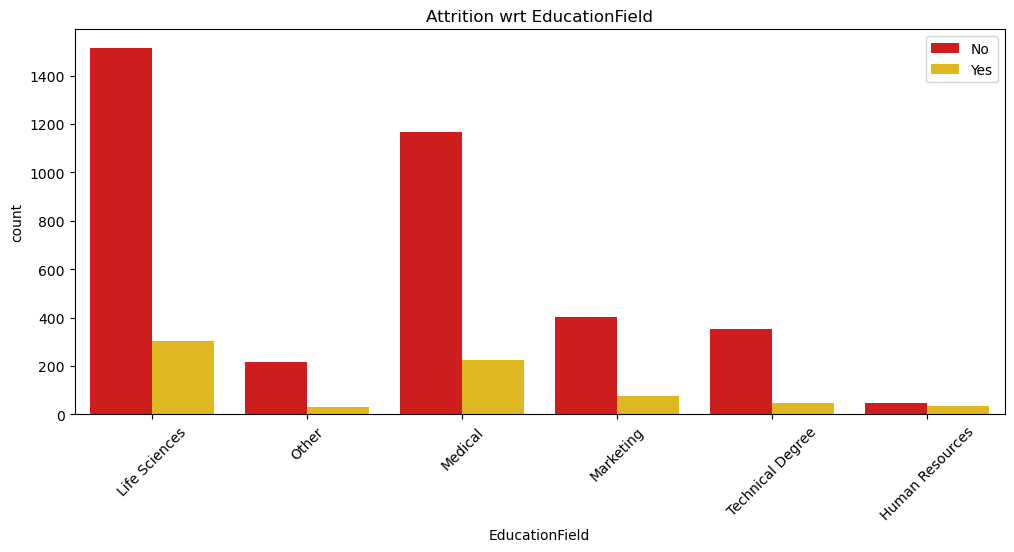

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=data,palette='hot')
plt.title("Attrition wrt EducationField")
plt.legend(loc = 'best')
plt.xticks(rotation=45)
plt.show()

Relatively Attrition is more in Human Resources EducationField

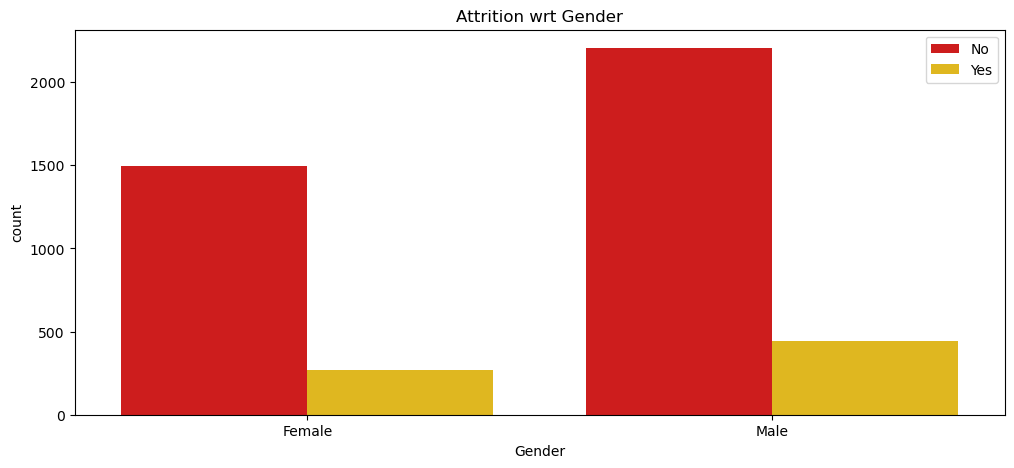

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=data,palette='hot')
plt.title("Attrition wrt Gender")
plt.legend(loc = 'best')
plt.show()

In [14]:
data.groupby(["Gender","Attrition"]).agg({"EmployeeCount":"sum"})

EmployeeCount
Gender Attrition               
Female No                  1494
       Yes                  270
Male   No                  2205
       Yes                  441

In [15]:
#Attrition percentage in female
270/(270+1494)

0.15306122448979592

In [16]:
#Attrition percentage in male
441/(441+2205)

0.16666666666666666

We can observe that attrition is slightly more in male than female

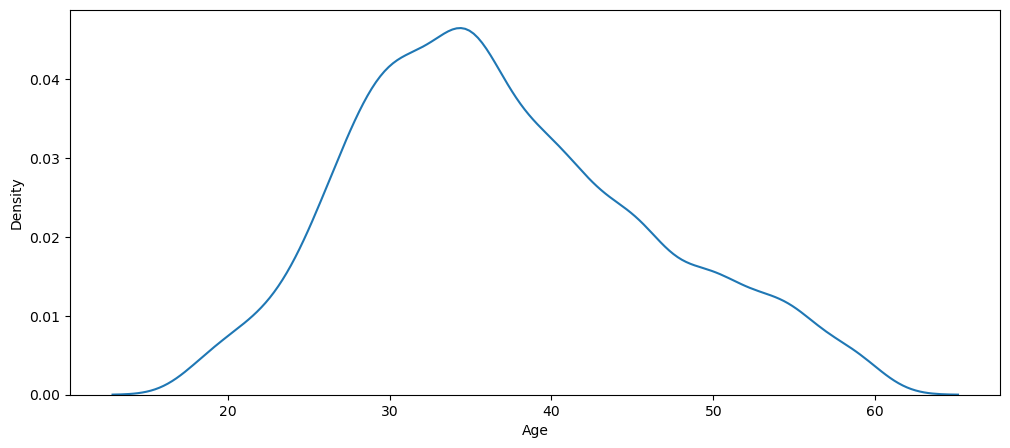

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(data['Age'],hist=False)
plt.show()

In the company most employees are in the age gap of 30-40

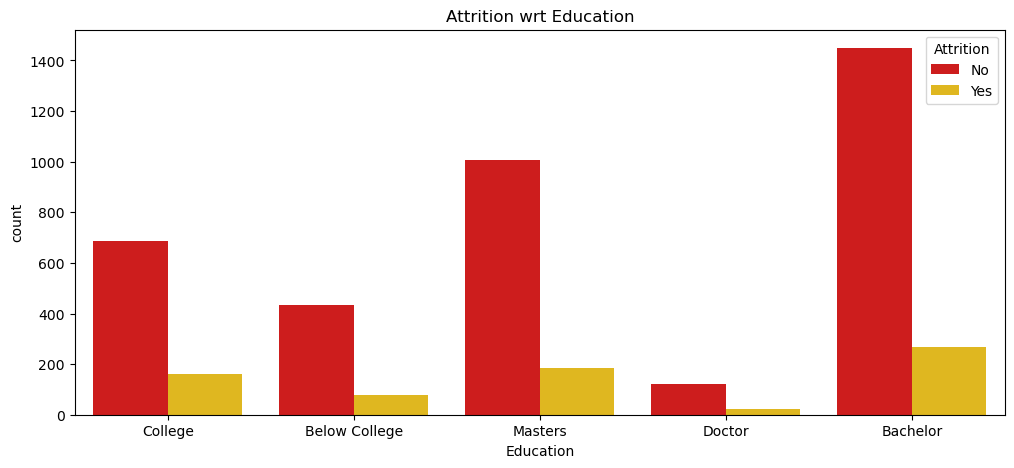

In [18]:
edu_map = {1 :'Below College', 2 :'College' , 3:'Bachelor', 4:'Masters' , 5:'Doctor'}
plt.figure(figsize=(12,5))
sns.countplot(x=data['Education'].map(edu_map),hue='Attrition',data=data,palette='hot')
plt.title('Attrition wrt Education')
plt.show()

There are more no.of employees with Bachelor as well as masters Education. Attrition is comparitively high in bachelor

Encoding

In [19]:
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})

In [20]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
data['Over18'] = data['Over18'].map({'Y':1,'No':0})

In [21]:
from sklearn.preprocessing import LabelEncoder
encoding_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for col in encoding_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [22]:
pd.set_option('display.max_columns',None)

In [23]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,2,2,6,2,1,1,1,1,0,1,131160,1.0,1,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,1,1,10,1,1,1,1,1,6,2,41890,0.0,1,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,1,1,17,4,4,1,0,4,7,1,193280,1.0,1,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,0,1,2,5,1,1,0,3,1,1,83210,3.0,1,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,2,1,10,1,3,1,0,1,7,2,23420,4.0,1,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [24]:
X = data.drop(['Attrition'],axis=1)
Y = data['Attrition'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3528, 28)
(3528,)
(882, 28)
(882,)


Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [28]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
pred_train = model.predict(X_train)
cm = confusion_matrix(Y_train,pred_train)
print("Accuracy Score for training:",accuracy_score(Y_train,pred_train))

Accuracy Score for training: 0.8384353741496599


In [30]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Accuracy Score:",accuracy_score(Y_test,pred))
print("precision Score:",precision_score(Y_test,pred))
print("recall Score:",recall_score(Y_test,pred))
print("f1 Score:",f1_score(Y_test,pred))

Accuracy Score: 0.8401360544217688
precision Score: 0.0
recall Score: 0.0
f1 Score: 0.0


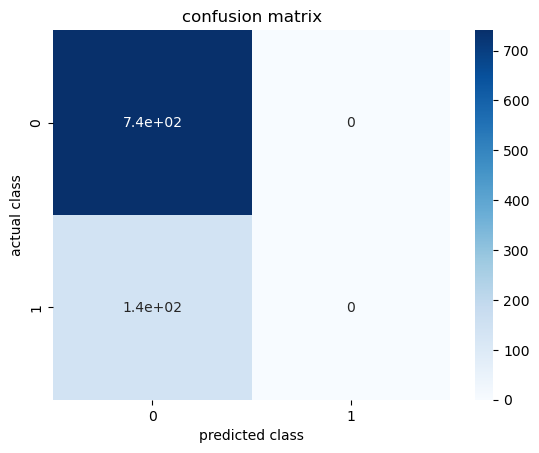

In [31]:
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.title("confusion matrix")
plt.show()

RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state=0)
model1.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [33]:
pred_train = model1.predict(X_train)
print("Accuracy Score for training:",accuracy_score(Y_train,pred_train))

Accuracy Score for training: 0.9985827664399093


In [34]:
prediction = model1.predict(X_test)
cm = confusion_matrix(Y_test,prediction)
print("Accuracy Score:",accuracy_score(Y_test,prediction))
print("precision Score:",precision_score(Y_test,prediction))
print("recall Score:",recall_score(Y_test,prediction))
print("f1 Score:",f1_score(Y_test,prediction))

Accuracy Score: 0.9739229024943311
precision Score: 1.0
recall Score: 0.8368794326241135
f1 Score: 0.9111969111969112


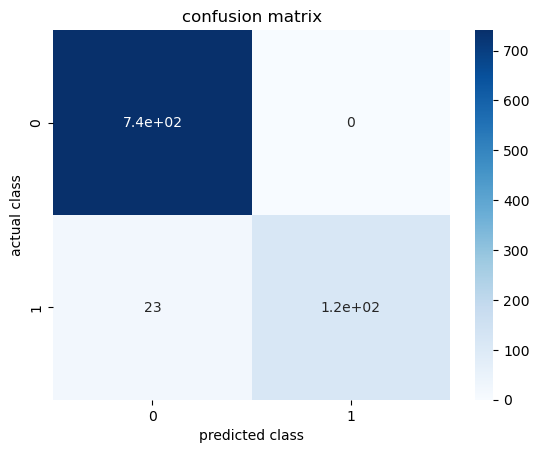

In [35]:
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("predicted class")
plt.ylabel("actual class")
plt.title("confusion matrix")
plt.show()